In [34]:
import pandas as pd
import os
import numpy as np
df = pd.read_csv('data.csv')
df.head(5)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [ ]:
# Data Preprocessing or Data Cleaning

# Bad data handling
# 1.Empty values
# 2.Wrong formats   30/05/2025       30052025   30-05-2025
# 3.Wrong data      Age 23           -23     123,    20   to 29  129
# 4.Duplicates       More entries for the same person

In [8]:
#empty values/cells
print(df.isnull().sum())


Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [14]:
#check wrong formats
print(df.dtypes)


Duration      int64
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object


In [35]:
# Check for non numeric values in numeric columns
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    if not pd.to_numeric(df[col], errors='coerce').notnull().all():
        print(f"Non-numeric values found in column: {col}")

Non-numeric values found in column: Calories


In [37]:

# Wrong data
# Check for negative values in numeric columns
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    if (df[col] < 0).any():
        print(f"Negative values found in column: {col}")

In [38]:
# Duplicates
duplicates = df.duplicated()
if duplicates.any():
    print("Duplicates found:")
    print(df[duplicates])
else:
    print("No duplicates found.")

Duplicates found:
     Duration  Pulse  Maxpulse  Calories
36         60    102       127     300.0
37         60    100       120     300.0
38         60    100       120     300.0
40         45     90       112     180.1
71         60    109       153     387.6
113        45    100       120     225.3
155        60    111       151     368.5


In [21]:
#Fill empty cells with the mean of the column
df.fillna(df.mean(), inplace=True)

In [39]:
df.head(30)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [23]:
print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


In [40]:
# EDA Exploratory Data Analysis
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (169, 4)


In [24]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,169.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,262.385991
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,253.300000
50%,60.000000,105.000000,131.000000,321.000000
75%,60.000000,111.000000,141.000000,384.000000
max,300.000000,159.000000,184.000000,1860.400000


In [26]:
#data visuaalistion
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'duration distribution')

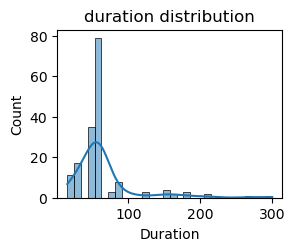

In [29]:
#histogram
plt.Figure(figsize=(15,10))
#histogram for duration
plt.subplot(2,2,2)

sns.histplot(df['Duration'],bins=30,kde=True)
plt.title('duration distribution')

Text(0.5, 1.0, 'Pulse vs Calories')

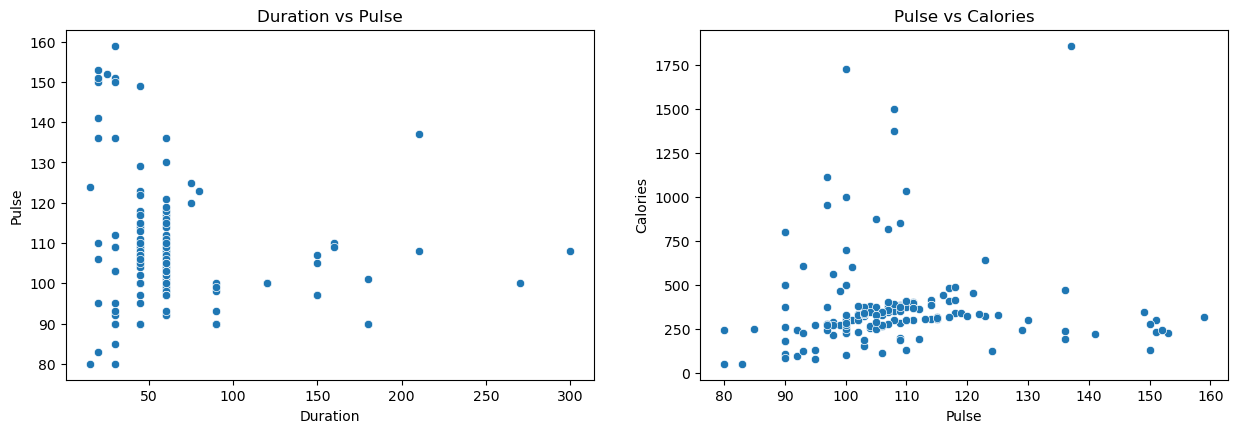

In [31]:
#scatter plot of  duration vs pulse
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x='Duration', y = 'Pulse', data=df)
plt.title('Duration vs Pulse')

plt.subplot(2,2,2)
sns.scatterplot(x='Pulse', y = 'Calories', data=df)
plt.title('Pulse vs Calories')

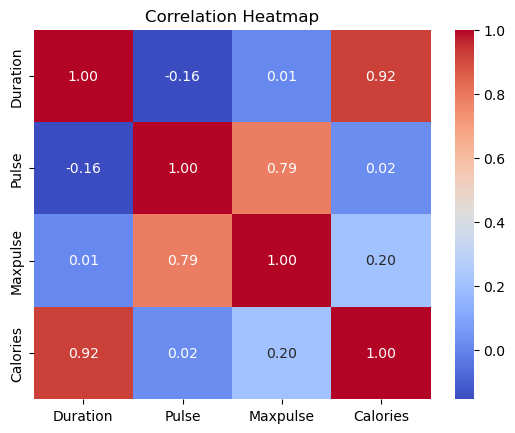

In [32]:
# Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()